In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import alphalens

In [2]:
df_forward_returns = pd.read_csv('Aqueduct_US_Data_symbol_forwardReturns.csv', index_col=0)

In [3]:
# cur_factor = 'EPS_consensus_2_1'  ### top quantile good
# cur_factor = 'EPS_surprise'  ### top quantile good
# cur_factor = 'Accounts_Payable'   ### bottom quantile good
# cur_factor = 'Accrued_Expense'
# cur_factor = 'Net_Goodwill'  ### too many missing
# cur_factor = 'Bad_Debt'
cur_factor = 'Current_Ratio'  ### positive two 0
# cur_factor = 'EPS_growth_3or5years_Forecast'  ## negative
# cur_factor = 'Insider_buy_90d'  ### positive two 0, too many missing
# cur_factor = 'Insider_sell_90d'  ### positive two 0, too many missing
# cur_factor = 'eps_gr_1yr'
# cur_factor = 'eps_gr_4q'
# cur_factor = 'cash_only'
# cur_factor = 'ev_to_ebitda_mean_4q'
# cur_factor = 'gross_profitability'
# cur_factor = 'price_to_book'
# cur_factor = 'debt'
# cur_factor = 'price_to_cash_flow'   ### negative but quantile plot opposite
# cur_factor = 'Price_Growth_6or12months_Forecast'  ## positive two 0, strong
# cur_factor = 'price_to_earnings'
# cur_factor = 'Market_Value_1YrGrowth'
# cur_factor = 'entrpr_val_ebitda_oper'
# cur_factor = 'shares_held_by_insiders_percentage'  ### negative but top quantile good
# cur_factor = 'value_trap'  ### positive two 0

In [4]:
cols = ['sid', 'symbol', 'Sector', cur_factor]

In [5]:
df_feauture_1 = pd.read_csv('Aqueduct_US_Data_symbol_20060101_20091231.csv', index_col=0)

In [7]:
print(list(df_feauture_1.columns))

['symbol', 'Accounts_Payable', 'Accrued_Expense', 'Bad_Debt', 'Current_Ratio', 'EPS_consensus_2_1', 'EPS_growth_3or5years_Forecast', 'EPS_surprise', 'Insider_buy_90d', 'Insider_sell_90d', 'Market_Value_1YrGrowth', 'Mkt_Cap', 'Net_Goodwill', 'Price_Growth_6or12months_Forecast', 'Sector', 'Yesterday_close_price', 'cash_only', 'debt', 'entrpr_val_ebitda_oper', 'eps_gr_1yr', 'eps_gr_4q', 'ev', 'ev_to_ebitda_mean_4q', 'gross_profitability', 'price_to_book', 'price_to_cash_flow', 'price_to_earnings', 'returns_1mo', 'returns_1yr', 'returns_3mo', 'returns_6mo', 'shares_held_by_insiders_percentage', 'sid', 'value_trap']


In [8]:
df_feauture_1_filtered = df_feauture_1[cols].copy(deep=True)
del df_feauture_1

In [16]:
# temp4ticker = df_feauture_1_filtered[['symbol', 'Sector']]
# temp4ticker = temp4ticker.drop_duplicates()
# temp4ticker.index = range(temp4ticker.shape[0])
# temp4ticker.to_csv('temp4ticker.csv')

In [8]:
df_feauture_2 = pd.read_csv('Aqueduct_US_Data_symbol_20100101_20200505.csv', index_col=0)

In [9]:
df_feauture_2_filtered = df_feauture_2[cols].copy(deep=True)
del df_feauture_2

In [10]:
df_feature = pd.concat([df_feauture_1_filtered, df_feauture_2_filtered])
df_feature = df_feature.reset_index()

In [11]:
list(df_feature['Sector'].unique())

['Non-Energy Materials',
 'Finance',
 'Technology',
 'Healthcare',
 'Industrials',
 'Business Services',
 nan,
 'Consumer Cyclicals',
 'Consumer Non-Cyclicals',
 'Energy',
 'Utilities',
 'Consumer Services',
 'Telecommunications',
 'Other']

In [12]:
cur_sector = 'Utilities'

In [13]:
al_data = df_feature.copy(deep=True)
cols_forward_returns = ['returns_1mo_forward', 'returns_3mo_forward', 'returns_1yr_forward']
al_data[cols_forward_returns] = df_forward_returns[cols_forward_returns]

In [14]:
al_data = al_data[al_data['Sector']==cur_sector]
al_data = al_data.drop('Sector', axis=1)

In [15]:
al_data = al_data.set_index(['date', 'sid'])

In [16]:
al_data = al_data.drop('symbol', axis=1)

In [29]:
al_data[cur_factor] = - al_data[cur_factor]

In [31]:
al_data.corr()

,Current_Ratio,returns_1mo_forward,returns_3mo_forward,returns_1yr_forward
Current_Ratio,1.000000,0.015526,0.036292,0.065590
returns_1mo_forward,0.015526,1.000000,0.534769,0.281275
returns_3mo_forward,0.036292,0.534769,1.000000,0.488471
returns_1yr_forward,0.065590,0.281275,0.488471,1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


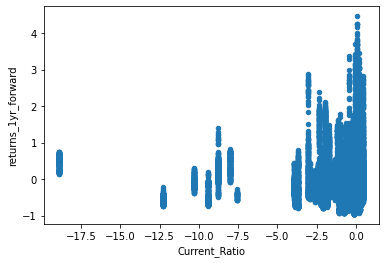

In [32]:
cols_check = [cur_factor, 'returns_1yr_forward']
# data_to_plot.loc[(data_to_plot[cur_factor] == np.inf), 'gross_profitability'] = np.nan
data_to_plot = al_data[cols_check].dropna()
data_to_plot = data_to_plot.replace([np.inf, -np.inf], np.nan)

factor_zscore_whole = (data_to_plot[cur_factor] - data_to_plot[cur_factor].mean()) / (data_to_plot[cur_factor].std())

data_to_plot[cur_factor] = factor_zscore_whole
data_to_plot.plot.scatter(x=cols_check[0], y=cols_check[1])

In [33]:
# data_to_plot[cur_factor].max()
# data_to_plot[data_to_plot[cur_factor] == np.inf]
# data_to_plot.loc[(data_to_plot[cur_factor] == np.inf), 'gross_profitability']

In [34]:
# data_to_plot.loc[data_to_plot[cur_factor] == np.inf, 'gross_profitability'] = np.nan

In [35]:
check = al_data[cols_check].dropna()
print(check.shape)
print(check[check['returns_1yr_forward']>10].shape)

(286002, 2)
(0, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


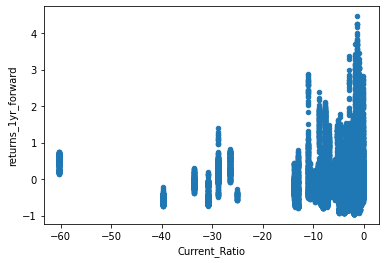

In [36]:
check[check['returns_1yr_forward']<10].plot.scatter(x=cols_check[0], y=cols_check[1])

In [37]:
factor_to_evaluate = al_data[cur_factor]
forward_returns = al_data[cols_forward_returns]

In [38]:
# print(type(forward_returns))
# forward_returns.head()

In [39]:
# data_for_alphalens = alphalens.utils.get_clean_factor(factor_to_evaluate, forward_returns) 
data_for_alphalens = alphalens.utils.get_clean_factor(factor_to_evaluate, forward_returns, max_loss=0.8) 

Dropped 12.0% entries from factor data: 12.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 80.0%, not exceeded: OK!


In [40]:
data_for_alphalens = data_for_alphalens.reset_index()
data_for_alphalens['date'] = pd.to_datetime(data_for_alphalens['date'])  ### make sure the dtype of date column
data_for_alphalens.columns = ['date', 'asset'] + list(data_for_alphalens.columns[2:])
data_for_alphalens = data_for_alphalens.set_index(['date', 'asset'])
data_for_alphalens.columns = ['21D', '63D', '252D'] + list(data_for_alphalens.columns[3:])  ### alphalens only take standard column names

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-60.318058,-1.217084,-3.794754,6.289064,58409,20.528240
2,-1.766207,-0.812895,-1.243393,0.150248,56129,19.726918
3,-1.274595,-0.641017,-0.975051,0.117149,56264,19.774365
4,-0.998556,-0.495973,-0.782010,0.108830,56129,19.726918
5,-0.850302,-0.040006,-0.543214,0.164645,57599,20.243560


Returns Analysis


,21D,63D,252D
Ann. alpha,0.045,0.071,0.075
beta,-0.027,-0.138,-0.176
Mean Period Wise Return Top Quantile (bps),14.630,20.557,11.739
Mean Period Wise Return Bottom Quantile (bps),-20.860,-28.417,-34.143
Mean Period Wise Spread (bps),35.490,51.337,48.584


<Figure size 432x288 with 0 Axes>

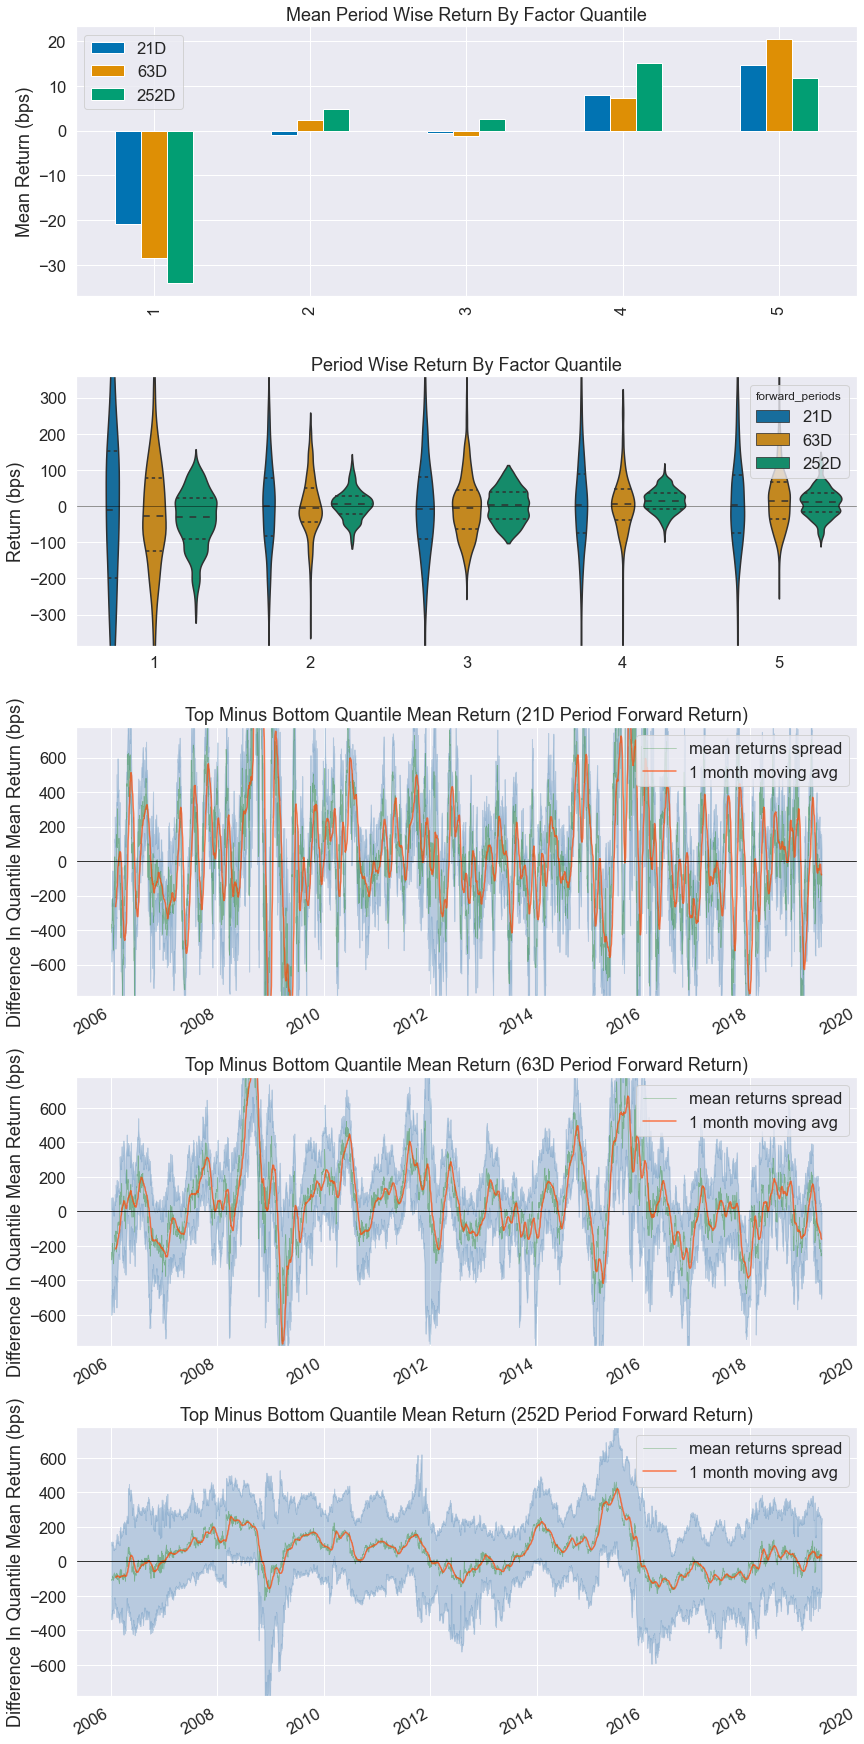

Information Analysis


,21D,63D,252D
IC Mean,0.029,0.052,0.092
IC Std.,0.160,0.161,0.163
Risk-Adjusted IC,0.178,0.322,0.563
t-stat(IC),10.327,18.642,32.611
p-value(IC),0.000,0.000,0.000
IC Skew,0.104,-0.064,-0.008
IC Kurtosis,-0.151,-0.246,-0.920


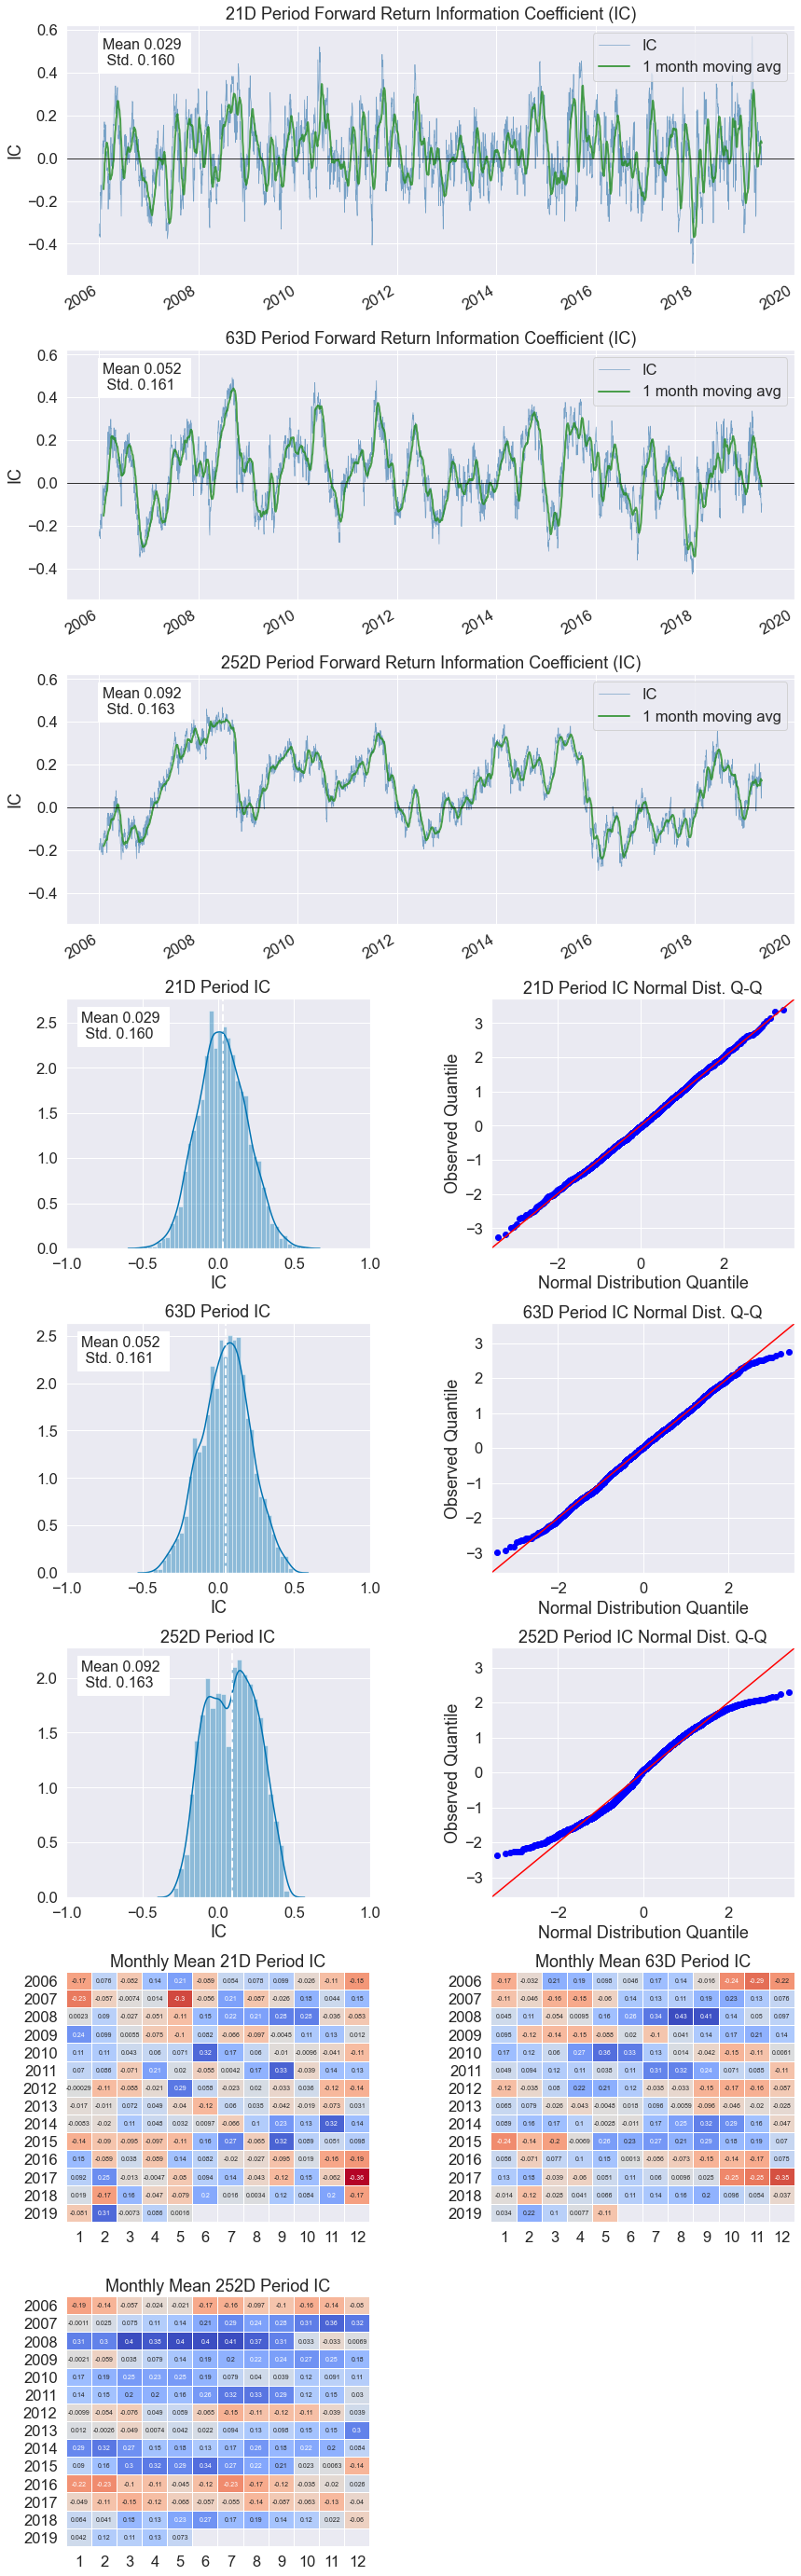

Turnover Analysis


,21D,63D,252D
Quantile 1 Mean Turnover,0.065,0.135,0.397
Quantile 2 Mean Turnover,0.094,0.201,0.595
Quantile 3 Mean Turnover,0.095,0.208,0.632
Quantile 4 Mean Turnover,0.088,0.205,0.643
Quantile 5 Mean Turnover,0.054,0.131,0.421


,21D,63D,252D
Mean Factor Rank Autocorrelation,0.976,0.932,0.732


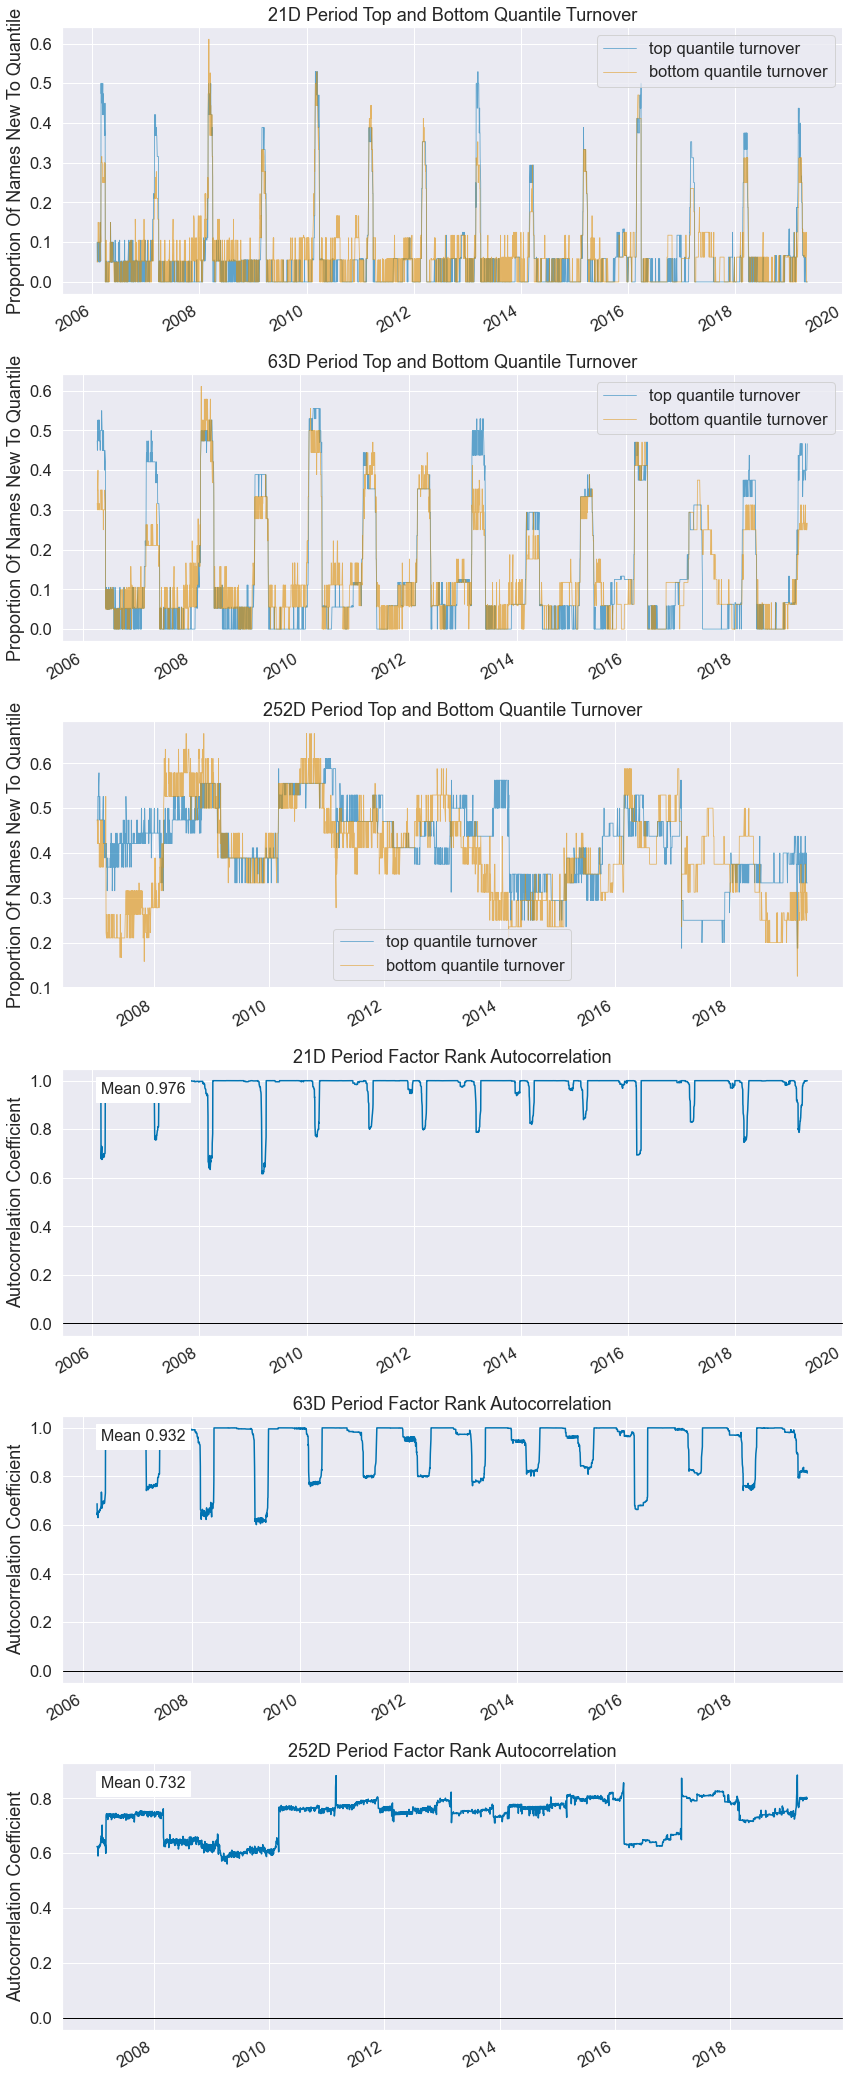

In [41]:
alphalens.tears.create_full_tear_sheet(data_for_alphalens)